In [2]:
import numpy as np
import networkx as nx
from edge_fetch import edge_terrier
from sklearn.cluster import AffinityPropagation
from sklearn.preprocessing import normalize
from featureAnalysis import featureSelection
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples

In [4]:
#Load Edgelists

# Initialize edgelist collector object
graph_collector = edge_terrier('/Users/paigefrank/Library/Python/3.6/bin/aws', 1 , filepath='hbn/derivatives/graphs/JHU/')
# Make a generator that yields all edgelists in filepath
filelist = graph_collector.convert_edgelist_all()
# Get a list of just the network x objects
graphList = graph_collector.getGraphs(filelist)

sub-NDARDX770PJK_acq-64dir_dwi_JHU.edgelist is empty.


In [9]:
#Output feature matrix to a file
numFeatures = 2

#UNCOMMENT TO USE EIGENVECTOR CENTRALITY
# featureObj = featureSelection(graphList[0])
# X = featureObj.eigenvectorCentrality(numFeatures)
# mat = np.matrix(X, dtype = float)
# with open('outfileMat.txt','wb') as f:
#     for line in mat:
#         np.savetxt(f, line, fmt='%.2f')
# print("Feature matrix of shape", mat.shape, "outputted. Run Urerf in R now.")


#UNCOMMENT TO USE EIGEN VALUES OF LAPLACIAN
featureObj = featureSelection(graphList[0])
X = featureObj.calc_eigval_feature_matrix(numFeatures)
mat = np.matrix(X, dtype = float)
with open('outfileMat.txt','wb') as f:
    for line in mat:
        np.savetxt(f, line, fmt='%.2f')
print("Feature matrix of shape", mat.shape, "outputted. Run Urerf in R now.")

#UNCOMMENT TO USE KHOP
# featureObj = featureSelection(graphList[0])
# X = featureObj.getKhopFeatMat(numFeatures)
# mat = np.matrix(X, dtype = float)
# with open('outfileMat.txt','wb') as f:
#     for line in mat:
#         np.savetxt(f, line, fmt='%.2f')
# print("Feature matrix of shape", mat.shape, "outputted. Run Urerf in R now.")

[0.0085373168241947486, 0.0080883172901440783, 0.0027419380045035739, 0.0086315785888032084, 0.013635096852115948, 0.027475274741720648, 0.037177384832552236, 0.047803699304086726, 0.063974775328120653, 0.07106381340752646, 0.071342329637574087, 0.073885894219364617, 0.065469432624105969, 0.064494193783816031, 0.056743612618648437, 0.056825464307256518, 0.04662421247692123, 0.049931741535730913, 0.050526056958093597, 0.047092914838064347, 0.041412334366995006, 0.039485687999568496, 0.033140503547880611, 0.035742259354320349, 0.03167961602086309, 0.027307388716077494, 0.022673726828813915, 0.021397879504625707, 0.023290570692108086, 0.020368519954374803, 0.018885052084991829, 0.01667622910472696, 0.016855429205382425, 0.016127383936497344, 0.015233242437474542, 0.012926262448470525, 0.012160910046748649, 0.010217946732387578, 0.0095371420156302698, 0.01039316704363682, 0.0099602871571857678, 0.0087760827445061505, 0.0078120649523375496, 0.0081930718135210315, 0.0078976637666331711, 0.00

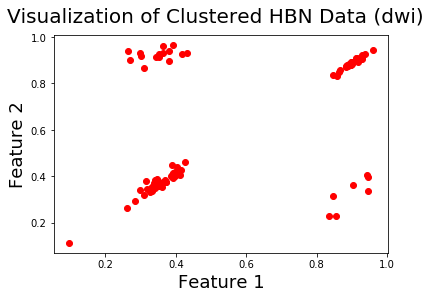

In [10]:
#Graph the data if the features are less than 3 dimensions

if (numFeatures == 2):
    fig = plt.figure()
    plt.plot(mat[:,0], mat[:,1],'ro')
    fig.suptitle("Visualization of Clustered HBN Data (dwi)", fontsize=20)
    plt.xlabel("Feature 1", fontsize=18)
    plt.ylabel("Feature 2", fontsize=18)
if (numFeatures == 3):
    fig = plt.figure()
    ax = Axes3D(fig)
    x = mat[:,0]
    y = mat[:,1]
    z = mat[:,2]
    c1 = ax.scatter(x,y,z,marker='x')
    fig.suptitle("Visualization of Clustered HBN Data (dwi)", fontsize=20)
    ax.set_xlabel("Feature 1", fontsize=18)
    ax.set_ylabel("Feature 2", fontsize=18)
    ax.set_zlabel("Feature 3", fontsize=18)

In [11]:
#Load Urerf Similarity matrix from file

matrix = open('outfileSimMat.txt').read()
matrix = [item.split() for item in matrix.split('\n')[:-1]]
inputMat = np.matrix(matrix, dtype = float)

In [12]:
#Cluster with affinity Propogation for multiple parameters

maxDamp = 0
maxPreproc = 0
maxSil = 0
preproc = 0
for i in range(1, 90):
    #vary the preference value
    preproc = preproc + .01
    for j in range(5, 10):
        #vary the damping value
        damp = .1 * j
        af = AffinityPropagation(damping = damp, preference = preproc,affinity="precomputed").fit(inputMat)
        cluster_centers_indices = af.cluster_centers_indices_
        labels = af.labels_
        n_clusters = len(cluster_centers_indices)
        ss = silhouette_score(inputMat, labels)
        print('|Preference |% 1.2f' % preproc, "| Damping | % 1.1f" % damp,"| Clusters | ", n_clusters, "| Silhouette | % 1.3f" % ss, "|")
        
        #capture max preproc and damping
        if (ss > maxSil):
            maxDamp = damp
            maxPreproc = preproc
            maxSil = ss
print("Best Damping Value:", maxDamp, "Best Preference Value:", maxPreproc)
        
        

|Preference | 0.01 | Damping |  0.5 | Clusters |  21 | Silhouette |  0.557 |
|Preference | 0.01 | Damping |  0.6 | Clusters |  19 | Silhouette |  0.553 |
|Preference | 0.01 | Damping |  0.7 | Clusters |  21 | Silhouette |  0.557 |
|Preference | 0.01 | Damping |  0.8 | Clusters |  21 | Silhouette |  0.513 |
|Preference | 0.01 | Damping |  0.9 | Clusters |  15 | Silhouette |  0.397 |
|Preference | 0.02 | Damping |  0.5 | Clusters |  20 | Silhouette |  0.556 |
|Preference | 0.02 | Damping |  0.6 | Clusters |  20 | Silhouette |  0.556 |
|Preference | 0.02 | Damping |  0.7 | Clusters |  22 | Silhouette |  0.561 |
|Preference | 0.02 | Damping |  0.8 | Clusters |  18 | Silhouette |  0.533 |
|Preference | 0.02 | Damping |  0.9 | Clusters |  15 | Silhouette |  0.397 |
|Preference | 0.03 | Damping |  0.5 | Clusters |  21 | Silhouette |  0.581 |
|Preference | 0.03 | Damping |  0.6 | Clusters |  20 | Silhouette |  0.556 |
|Preference | 0.03 | Damping |  0.7 | Clusters |  22 | Silhouette |  0.561 |

|Preference | 0.22 | Damping |  0.8 | Clusters |  21 | Silhouette |  0.553 |
|Preference | 0.22 | Damping |  0.9 | Clusters |  9 | Silhouette |  0.302 |
|Preference | 0.23 | Damping |  0.5 | Clusters |  22 | Silhouette |  0.559 |
|Preference | 0.23 | Damping |  0.6 | Clusters |  24 | Silhouette |  0.607 |
|Preference | 0.23 | Damping |  0.7 | Clusters |  23 | Silhouette |  0.592 |
|Preference | 0.23 | Damping |  0.8 | Clusters |  21 | Silhouette |  0.553 |
|Preference | 0.23 | Damping |  0.9 | Clusters |  22 | Silhouette |  0.306 |
|Preference | 0.24 | Damping |  0.5 | Clusters |  22 | Silhouette |  0.559 |
|Preference | 0.24 | Damping |  0.6 | Clusters |  22 | Silhouette |  0.559 |
|Preference | 0.24 | Damping |  0.7 | Clusters |  22 | Silhouette |  0.559 |
|Preference | 0.24 | Damping |  0.8 | Clusters |  22 | Silhouette |  0.559 |
|Preference | 0.24 | Damping |  0.9 | Clusters |  22 | Silhouette |  0.297 |
|Preference | 0.25 | Damping |  0.5 | Clusters |  22 | Silhouette |  0.567 |


|Preference | 0.44 | Damping |  0.8 | Clusters |  27 | Silhouette |  0.624 |
|Preference | 0.44 | Damping |  0.9 | Clusters |  26 | Silhouette |  0.331 |
|Preference | 0.45 | Damping |  0.5 | Clusters |  27 | Silhouette |  0.624 |
|Preference | 0.45 | Damping |  0.6 | Clusters |  27 | Silhouette |  0.624 |
|Preference | 0.45 | Damping |  0.7 | Clusters |  27 | Silhouette |  0.624 |
|Preference | 0.45 | Damping |  0.8 | Clusters |  25 | Silhouette |  0.572 |
|Preference | 0.45 | Damping |  0.9 | Clusters |  26 | Silhouette |  0.331 |
|Preference | 0.46 | Damping |  0.5 | Clusters |  27 | Silhouette |  0.624 |
|Preference | 0.46 | Damping |  0.6 | Clusters |  27 | Silhouette |  0.624 |
|Preference | 0.46 | Damping |  0.7 | Clusters |  27 | Silhouette |  0.624 |
|Preference | 0.46 | Damping |  0.8 | Clusters |  25 | Silhouette |  0.572 |
|Preference | 0.46 | Damping |  0.9 | Clusters |  26 | Silhouette |  0.331 |
|Preference | 0.47 | Damping |  0.5 | Clusters |  27 | Silhouette |  0.624 |

|Preference | 0.66 | Damping |  0.7 | Clusters |  41 | Silhouette |  0.580 |
|Preference | 0.66 | Damping |  0.8 | Clusters |  41 | Silhouette |  0.580 |
|Preference | 0.66 | Damping |  0.9 | Clusters |  44 | Silhouette |  0.378 |
|Preference | 0.67 | Damping |  0.5 | Clusters |  43 | Silhouette |  0.615 |
|Preference | 0.67 | Damping |  0.6 | Clusters |  43 | Silhouette |  0.615 |
|Preference | 0.67 | Damping |  0.7 | Clusters |  41 | Silhouette |  0.580 |
|Preference | 0.67 | Damping |  0.8 | Clusters |  41 | Silhouette |  0.580 |
|Preference | 0.67 | Damping |  0.9 | Clusters |  44 | Silhouette |  0.378 |
|Preference | 0.68 | Damping |  0.5 | Clusters |  43 | Silhouette |  0.615 |
|Preference | 0.68 | Damping |  0.6 | Clusters |  43 | Silhouette |  0.615 |
|Preference | 0.68 | Damping |  0.7 | Clusters |  41 | Silhouette |  0.580 |
|Preference | 0.68 | Damping |  0.8 | Clusters |  41 | Silhouette |  0.580 |
|Preference | 0.68 | Damping |  0.9 | Clusters |  23 | Silhouette |  0.239 |

|Preference | 0.88 | Damping |  0.6 | Clusters |  60 | Silhouette |  0.517 |
|Preference | 0.88 | Damping |  0.7 | Clusters |  60 | Silhouette |  0.517 |
|Preference | 0.88 | Damping |  0.8 | Clusters |  56 | Silhouette |  0.516 |
|Preference | 0.88 | Damping |  0.9 | Clusters |  44 | Silhouette |  0.421 |
|Preference | 0.89 | Damping |  0.5 | Clusters |  61 | Silhouette |  0.510 |
|Preference | 0.89 | Damping |  0.6 | Clusters |  61 | Silhouette |  0.510 |
|Preference | 0.89 | Damping |  0.7 | Clusters |  61 | Silhouette |  0.510 |
|Preference | 0.89 | Damping |  0.8 | Clusters |  57 | Silhouette |  0.509 |
|Preference | 0.89 | Damping |  0.9 | Clusters |  45 | Silhouette |  0.448 |
Best Damping Value: 0.5 Best Preference Value: 0.5300000000000002


In [13]:
#isolate best clustering output and create a sorted similarity matrix

af = AffinityPropagation(damping = maxDamp, preference = maxPreproc,affinity="precomputed").fit(inputMat)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_
n_clusters = len(cluster_centers_indices)
#create a dictionary of labels and subjects
nodeDict = dict(enumerate(labels))
#sort the subjects so that they are grouped by cluster label
s = sorted(nodeDict, key=nodeDict.get)
#create a sorted similarity matrix
sortedSimMat = np.empty((len(s), len(s)))
for i in range(0, len(s)):
    node = s[i]
    for j in range(0,len(s)):
        node2 = s[j]
        sortedSimMat[i][j] = inputMat[node, node2]

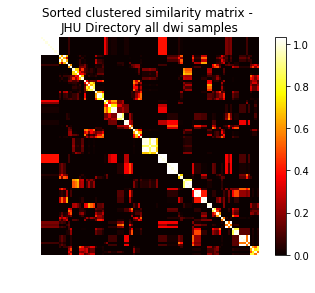

In [14]:
#create a heat map of the sorted similarity matrix
plt.figure(1)
im = plt.imshow(sortedSimMat, cmap='hot', interpolation='nearest')
cbar = plt.colorbar(im) 
plt.xlabel('Graphs')
plt.ylabel('Graphs')
plt.title("Sorted clustered similarity matrix - \nJHU Directory all dwi samples")
plt.axis('off')
plt.show()

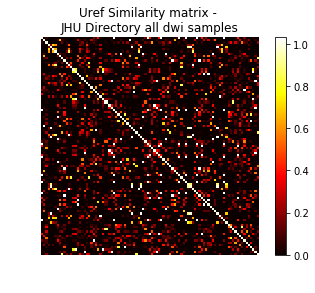

In [15]:
#create a heat map of the unsorted similarity matrix
plt.figure(2)
im = plt.imshow(inputMat, cmap='hot', interpolation='nearest')
cbar = plt.colorbar(im) 
plt.xlabel('Graphs')
plt.ylabel('Graphs')
plt.title("Uref Similarity matrix - \nJHU Directory all dwi samples")
plt.axis('off')
plt.show()

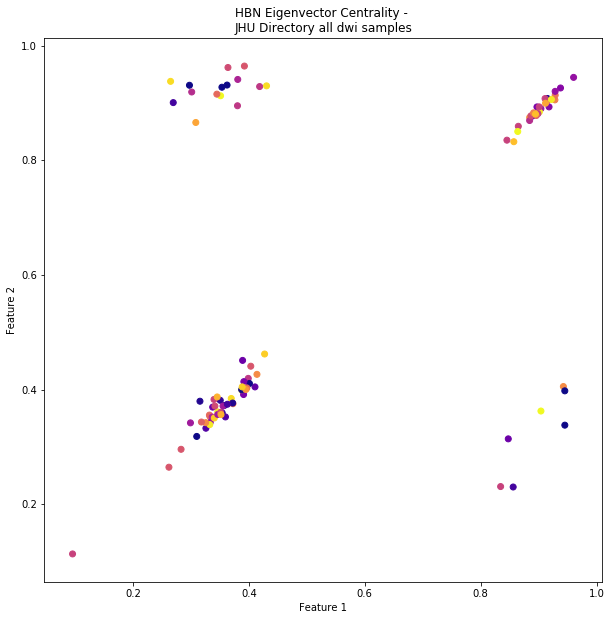

In [17]:
#Create a plot of the clusters color-coded as such

if (numFeatures ==2):
    fig = plt.figure(3, figsize=(10, 10))
    ax = plt.Axes(fig, rect=[0, 0, .5, .5])
    z = list(af.labels_)
    N = len(mat[:,1])
    x = [mat[:,0]]
    y = [mat[:,1]]
    #labels = np.ones((0,97))
    cmap = matplotlib.cm.get_cmap('plasma')
    normalize = matplotlib.colors.Normalize(vmin=min(z), vmax=max(z))
    colors = [cmap(normalize(value)) for value in z]
    plt.scatter(x, y, color = colors)
    plt.title("HBN Eigenvector Centrality - \nJHU Directory all dwi samples")
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    
if (numFeatures ==3):
    fig = plt.figure(4, figsize=(10, 10))
    ax = Axes3D(fig, rect=[0, 0, .5, .5], elev=40, azim=150)
    labels = af.labels_
    ax.scatter(mat[:, 0], mat[:, 1], mat[:, 2], c=labels, cmap = "plasma")
    ax.title("HBN Eigenvector Centrality - \nJHU Directory all dwi samples")
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Feature 3')